# Homework 3

**Due: 03/05/2020**

## References

+ Chapter 1, 2 from the [Bishop textbook](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf).
+ Lectures 12, 13 (inclusive).



## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.


## Student details

+ **First Name:Parveen**
+ **Last Name:Dhillon**
+ **Email:<pdhillon@purdue.edu>**

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_context('paper')
sns.set_style('white')
sns.set()
import scipy.stats as st
from sklearn.datasets import make_spd_matrix

# Problem 1

Suppose you conduct some experiments and collect a dataset of $N$ pairs of input and target variables, $\mathcal{D} = (x_{1:N}, y_{1:N})$, where $x_i \in \mathbb{R}$ and $y_i \in \mathbb{R}$, $\forall i$. 
Assume a Gaussian likelihood with the mean being a generalized linear model with weights $\mathbf{w}\in\mathbb{R}^m$ and basis functions $\boldsymbol{\phi}(x)\in\mathbb{R}^M$, and the noise variance being a constant $\sigma^2$.
On the weights, use an isotropic Gaussian prior, with precision parameter, $\alpha$.

1. Derive expressions for $\mathbf{m}_{N}$ and $\mathbf{S}_{N}$, the posterior mean and covariance of the model parameters respectively. Ask the question: What do I know about the weights given all the data I have seen? You will need Bayes rule for updating the weights and little bit of algebra. In particular, you will need a trick called "completing the square."

2. Use the results from part 1 to derive the posterior predictive distribution at an arbitrary test input $x^{*}$. Ask the question: What do I know about the $y^*$ at $x^*$ given all the data I have seen? You will need the sum rule of probability theory to connect this question to the likehood and the posterior you obtained in step 1.

3. Suppose now you perform an additional experiment and receive a data-point, $\mathcal{D}_{N+1}=(x_{N+1}, y_{N+1})$. Using the current posterior distribution over the parameters as the new prior, show that updating the model with the $(N+1)^{th}$ data-point results in the same posterior distribution shown above, with $N$ replaced by $N+1$.

The required expressions for all  of the above cases are well-known in closed form. It is, however, useful to work through the algebra atleast once. Feel free to consult Bishop's book, but in the end present your own derivation from scratch.

### Part 1 (Posterior mean and covariance of the model parameters)


+ Model the data $\mathcal{D} = (x_{1:N}, y_{1:N})$ using $m$ fixed basis/features:
$$
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})} \\ 
\text{where } \mathbf{x}\in\mathbb{R}^N \text{(inputs) } ; \mathbf{w}\in\mathbb{R}^M \text{(weights) }; \boldsymbol{\phi}(x)\in\mathbb{R}^M \text{(basis functions)} \\
\mathbf{y}(\mathbf{x};\mathbf{w}) = \boldsymbol{\Phi}\mathbf{w} \\
\text{where } \mathbf{y}\in\mathbb{R}^N \text{(outputs or target variables) } ;\boldsymbol{\Phi} \in \mathbb{R}^{N \times M} \text{(design matrix)}
$$

+ Gaussian **Likelihood** based on above given assumption:
$$
\mathbf{y}_{1:N} | \mathbf{x}_{1:N}, \mathbf{w}, \sigma \sim p(\mathbf{y}|\mathbf{x},\mathbf{w},\sigma) \sim N(\mathbf{y}|\boldsymbol{\Phi}\mathbf{w}, \sigma^2\mathbf{I})\\
\text{where } \sigma^2 \text{: (likelihood variance)}
$$
$$
\begin{array}{}
N(\mathbf{y}|\boldsymbol{\Phi}\mathbf{w}, \sigma^2\mathbf{I}) &=& \det(2\pi\sigma^{2}I)^{-1/2} \exp\left( -\frac{1}{2}(\mathbf{y}-\boldsymbol{\Phi}\mathbf{w})^T (\sigma^2\mathbf{I})^{-1} (\mathbf{y}-\boldsymbol{\Phi}\mathbf{w}) \right) \\
&=& (2\pi\sigma^2)^{-N/2} \exp\left( -\frac{1}{2\sigma^2}(\mathbf{y}-\boldsymbol{\Phi}\mathbf{w})^T (\mathbf{y}-\boldsymbol{\Phi}\mathbf{w}) \right) 
\end{array}
$$

+ Model the uncertainty in the model parameters using a isotropic Gaussian **prior**:
$$
\mathbf{w}|\alpha \sim p(\mathbf{w}|\alpha) \sim \mathcal{N}(\mathbf{w}|0,\alpha^{-1}\mathbf{I})\\
\text{where } \alpha \text{: (prior precision)}
$$
$$
\begin{array}{}
\mathcal{N}(\mathbf{w}|0,\alpha^{-1}\mathbf{I}) &=& \det(2\pi\alpha^{-1}I)^{-1/2} \exp\left( -\frac{1}{2}(\mathbf{w}-\mathbf{0})^T (\alpha^{-1}\mathbf{I})^{-1} (\mathbf{w}-\mathbf{0}) \right)\\
&=& (2\pi\alpha^{-1})^{-M/2} \exp\left( -\frac{\alpha}{2}\mathbf{w}^T \mathbf{w} \right)
\end{array}
$$
+ Posterior using Bayes' rule:
$$
p(\mathbf{w}|\mathcal{D}, \sigma,\alpha) 
= \frac{p(\mathbf{y}_{1:N}|\mathbf{x}_{1:N}, \mathbf{w}, \sigma)p(\mathbf{w}|\alpha)}
{\int p(\mathbf{y}_{1:N}|\mathbf{x}_{1:N}, \mathbf{w}', \sigma)p(\mathbf{w}'|\alpha)d\mathbf{w}'} \\
= \frac{\text{likelihood} \times \text{prior}}{\text{normalization constant}} \\
\propto p(\mathbf{y}|\mathbf{x}, \mathbf{w}, \sigma)p(\mathbf{w}|\alpha) \\
\propto N(\mathbf{y}|\boldsymbol{\Phi}\mathbf{w}, \sigma^2\mathbf{I}) \mathcal{N}(\mathbf{w}|0,\alpha^{-1}\mathbf{I}) \\
\propto (2\pi\sigma^2)^{-N/2} \exp\left( -\frac{1}{2\sigma^2}(\mathbf{y}-\boldsymbol{\Phi}\mathbf{w})^T (\mathbf{y}-\boldsymbol{\Phi}\mathbf{w}) \right) (2\pi\alpha^{-1})^{-M/2} \exp\left( -\frac{\alpha}{2}\mathbf{w}^T \mathbf{w} \right)\\
\propto \exp\left( -\frac{1}{2\sigma^2}(\mathbf{y}-\boldsymbol{\Phi}\mathbf{w})^T (\mathbf{y}-\boldsymbol{\Phi}\mathbf{w}) \right) \exp\left( -\frac{\alpha}{2}\mathbf{w}^T \mathbf{w} \right) \\
\propto  \exp\left( -\frac{\alpha}{2}\mathbf{w}^T \mathbf{w} -\frac{1}{2\sigma^2}(\mathbf{y}-\boldsymbol{\Phi}\mathbf{w})^T (\mathbf{y}-\boldsymbol{\Phi}\mathbf{w}) \right) \\
\propto \exp\left( -\frac{\alpha}{2}\mathbf{w}^T \mathbf{w} -\frac{\sigma^{-2}}{2} \left(\mathbf{y}^T\mathbf{y} + \mathbf{w}^T\boldsymbol{\Phi}^T\boldsymbol{\Phi} \mathbf{w} -2\mathbf{w}^T\boldsymbol{\Phi}^T\mathbf{y} \right) \right)\\
\propto \exp\left( -\frac{1}{2}\mathbf{w}^T(\alpha\mathbf{I}+\sigma^{-2}\boldsymbol{\Phi}^T\boldsymbol{\Phi}) \mathbf{w} + \mathbf{w}^T\sigma^{-2}\boldsymbol{\Phi^T}\mathbf{y} - \frac{\sigma^{-2}}{2} \mathbf{y}^T\mathbf{y} \right)
$$
As both prior and likelihood are Gaussian, posterior which is their product would be Gaussian, which can be seen from the above expression inside exponential as it is quadratic in $\mathbf{w}$. Comparing the above expression to the expression inside exponential of a general multivariate Gaussian distribution of $\mathbf{w}$ with mean $\mathbf{m}_N$ and covariance $\mathbf{S}_N$ as given by,
$$
\mathcal{N}(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N) = \det(2\pi\mathbf{S}_N)^{-1/2} \exp\left( -\frac{1}{2}(\mathbf{w}-\mathbf{m}_N)^T (\mathbf{S}_N)^{-1} (\mathbf{w}-\mathbf{m}_N) \right) \\
\propto \exp\left( -\frac{1}{2}\mathbf{w}^T \mathbf{S}_N^{-1} \mathbf{w} + \mathbf{w}^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{1}{2}\mathbf{m}_N^T\mathbf{S}_N^{-1}\mathbf{m}_N \right)
$$
Comparing the first two terms of above two expression we get posterior mean and covariance of the model parameters as:
$$
\mathbf{S}_N^{-1} = \alpha\mathbf{I}+\sigma^{-2}\boldsymbol{\Phi}^T\boldsymbol{\Phi} \Rightarrow
\mathbf{S}_N = (\alpha\mathbf{I}+\sigma^{-2}\boldsymbol{\Phi}^T\boldsymbol{\Phi})^{-1}\\
\mathbf{S}_N^{-1}\mathbf{m}_N = \sigma^{-2}\boldsymbol{\Phi^T}\mathbf{y} \Rightarrow
\mathbf{m}_N = \sigma^{-2} \mathbf{S}_N \boldsymbol{\Phi^T}\mathbf{y}
$$

### Part 2  (Posterior predictive distribution)

The predictive distribution $y^*$ at a new arbitrary test input $x^{*}$ can be calculated using sum rule as,
$$
p(y^*|x^*,\mathcal{D},\sigma,\alpha)=\int{p(y^*,\mathbf{w}|x^*,\mathcal{D},\sigma,\alpha)d\mathbf{w}}
$$
Then using Bayes' rule:
$$
p(y^*|x^*,\mathcal{D},\sigma,\alpha)=\int{p(y^*|\mathbf{w},x^*,\mathcal{D},\sigma,\alpha) p(\mathbf{w}|\mathcal{D},\sigma,\alpha) d\mathbf{w}} \\
\Rightarrow p(y^*|\mathbf{w},x^*,\mathcal{D},\sigma,\alpha) = \mathcal{N}(y^*|\mathbf{w}^T \phi(x^*),\sigma^2) \text{ (Likelihood)}\\
= \mathcal{N}(y^*|\phi(x^*)^T \mathbf{w} ,\sigma^2) \text{ (rearranging)} \\ 
\Rightarrow p(\mathbf{w}|\mathcal{D},\sigma,\alpha)  = \mathcal{N}(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N)  \text{ (Posterior)}
$$
As we can see that both likelihood and posterior are Gaussian distributions, and $y^*$ is linear in model parameters / weights $\mathbf{w}$, so the predictive distribution involves convolution of two Gaussian distributions. And as we can see from above expression that predictive distribution of $y^*$ i.e. $p(y^*|x^*,\mathcal{D},\sigma,\alpha)$ is a marginal distribution of $y^*$ from joint distribution of $y^*$ and $\mathbf{w}$ i.e. $p(y^*,\mathbf{w}|x^*,\mathcal{D},\sigma,\alpha)$. <br>
Then, based on the equations 2.113 to 2.115 from Bishop(2006) given as, <br>
" <br>
*Given a marginal Gaussian distribution for x and a conditional Gaussian distribution for y given x in the form*
$$
p(x) = \mathcal{N}(x|\mu, \Lambda^{-1}) \ \ \ \  (2.113)\\
p(y|x) = \mathcal{N}(y|Ax + b, L^{-1}) \ \ \ \ (2.114)
$$
*the marginal distribution of y is given by*
$$
p(y) = \mathcal{N}(y|A\mu + b, L^{-1} + A\Lambda^{-1}A^T) \ \ \ \ (2.115)
$$
" <br>
Where, for this questions, equivalent parameters as shown in the above equations are,
$$
\mu = \mathbf{m}_N; \ \Lambda^{-1}=\mathbf{S}_N \\
A = \phi(x^*)^T; \ b=0; \ L^{-1} = \sigma^2 
$$
The Posterior Predictive Distribution of $y^*$ is Gaussian which can we written as:
$$
p(y^*|x^*,\mathcal{D},\sigma,\alpha) = \mathcal{N}(y^*|m(x^*),S(x^*))
$$
where,
$$
m(x^*) = A\mu + b = \phi(x^*)^T \mathbf{m}_N + 0 = \mathbf{m}_N^T\phi(x^*) \\
S(x^*) = L^{-1} + A\Lambda^{-1}A^T = \sigma^2 + \phi(x^*)^T \mathbf{S}_N   (\phi(x^*)^T)^T = \sigma^2 + \phi(x^*)^T \mathbf{S}_N \phi(x^*)
$$
So the Posterior Predictive Distribution of $y^*$ is:
$$
p(y^*|x^*,\mathcal{D},\sigma,\alpha) = \mathcal{N}(y^*|\mathbf{m}_N^T\phi(x^*),\sigma^2 + \phi(x^*)^T \mathbf{S}_N \phi(x^*) )
$$

### Part 3 

+ Prior on model parameters:
$$
p(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N) \sim \mathcal{N}(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N)
$$
+ Model (Same as Part 1):
$$
y(x;\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(x) = \mathbf{w^{T}}\boldsymbol{\phi}(x) \\ 
$$
+ Likelihood (Same as Part 1):
$$
p(y|x,\mathbf{w},\sigma) \sim N(y|\mathbf{w}^T\boldsymbol{\phi}(x), \sigma^2)\\
$$
+ So, Posterior using Bayes' Rule:
$$
p(\mathbf{w}|\mathcal{D}_{N+1}, \sigma,\mathbf{m}_N,\mathbf{S}_N) 
= \frac{p(y_{N+1}|x_{N+1}, \mathbf{w}, \sigma)p(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N)}
{\int p(y_{N+1}|x_{N+1}, \mathbf{w}', \sigma)p(\mathbf{w}'|\mathbf{m}_N,\mathbf{S}_N)d\mathbf{w}'} \\
\propto N(y_{N+1}|\mathbf{w}^T\boldsymbol{\phi}(x_{N+1}), \sigma^2) \mathcal{N}(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N) \\
\propto N(y_{N+1}|\boldsymbol{\phi}(x_{N+1})^T\mathbf{w}, \sigma^2) \mathcal{N}(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N) \\
\propto \exp\left(-\frac{1}{2\sigma^2}(y_{N+1}-\boldsymbol{\phi}(x_{N+1})^T\mathbf{w})^T(y_{N+1}-\boldsymbol{\phi}(x_{N+1})^T\mathbf{w})  \right) \\
\times \exp\left( -\frac{1}{2}\mathbf{w}^T \mathbf{S}_N^{-1} \mathbf{w} + \mathbf{w}^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{1}{2}\mathbf{m}_N^T\mathbf{S}_N^{-1}\mathbf{m}_N \right) \\
\propto \exp\left(-\frac{1}{2\sigma^2}y_{N+1}^2 -\frac{1}{2\sigma^2}\mathbf{w}^T \boldsymbol{\phi}(x_{N+1}) \boldsymbol{\phi}(x_{N+1})^T\mathbf{w} + \frac{1}{\sigma^2}\mathbf{w}^T\boldsymbol{\phi}(x_{N+1})y_{N+1} \right)\\
\times \exp\left( -\frac{1}{2}\mathbf{w}^T \mathbf{S}_N^{-1} \mathbf{w} + \mathbf{w}^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{1}{2}\mathbf{m}_N^T\mathbf{S}_N^{-1}\mathbf{m}_N \right) \\
\propto \exp\left( -\frac{1}{2}\mathbf{w}^T(\mathbf{S}_N^{-1}+\sigma^{-2}\boldsymbol{\phi}(x_{N+1}) \boldsymbol{\phi}(x_{N+1})^T)\mathbf{w}  \\
+  \mathbf{w}^T(\mathbf{S}_N^{-1}\mathbf{m}_N + \sigma^{-2}\boldsymbol{\phi}(x_{N+1})y_{N+1})\right)
$$
Similar to part 1, here also as both the prior and likelihood are Gaussian, posterior which is their product would be Gaussian, which can be seen from the above expression inside exponential as it is quadratic in $\mathbf{w}$. Comparing the above expression to the expression inside exponential of a general multivariate Gaussian distribution of $\mathbf{w}$ with mean $\mathbf{m}_O$ and covariance $\mathbf{S}_O$ as given by,
$$
\mathcal{N}(\mathbf{w}|\mathbf{m}_O,\mathbf{S}_O) = \det(2\pi\mathbf{S}_O)^{-1/2} \exp\left( -\frac{1}{2}(\mathbf{w}-\mathbf{m}_O)^T (\mathbf{S}_O)^{-1} (\mathbf{w}-\mathbf{m}_O) \right) \\
\propto \exp\left( -\frac{1}{2}\mathbf{w}^T \mathbf{S}_O^{-1} \mathbf{w} + \mathbf{w}^T\mathbf{S}_O^{-1}\mathbf{m}_O - \frac{1}{2}\mathbf{m}_O^T\mathbf{S}_O^{-1}\mathbf{m}_O \right)
$$
Similar to part 1, comparing the first two terms of above two expression we get posterior mean and covariance of the model parameters as:
$$
\mathbf{S}_O^{-1} = \mathbf{S}_N^{-1}+\sigma^{-2}\boldsymbol{\phi}(x_{N+1}) \boldsymbol{\phi}(x_{N+1})^T
$$
where from part 1:
$$
\mathbf{S}_N^{-1} = \alpha\mathbf{I}+\sigma^{-2}\boldsymbol{\Phi}^T\boldsymbol{\Phi}
$$
So posterior variance inverse,
$$
\mathbf{S}_O^{-1} = \alpha\mathbf{I}+\sigma^{-2}\boldsymbol{\Phi}^T\boldsymbol{\Phi} + \sigma^{-2}\boldsymbol{\phi}(x_{N+1}) \boldsymbol{\phi}(x_{N+1})^T \\
= \alpha\mathbf{I}+\sigma^{-2}[\boldsymbol{\phi}(x_1) \ \boldsymbol{\phi}(x_2) \ \boldsymbol{\phi}(x_3) \dots \boldsymbol{\phi}(x_N)] \left[\boldsymbol{\phi}(x_1) \ \boldsymbol{\phi}(x_2) \ \boldsymbol{\phi}(x_3) \dots \boldsymbol{\phi}(x_N)\right]^T + \sigma^{-2}\boldsymbol{\phi}(x_{N+1}) \boldsymbol{\phi}(x_{N+1})^T \\
= \alpha\mathbf{I}+\sigma^{-2}\boldsymbol{\Phi'}^T\boldsymbol{\Phi'}
$$
where,
$$
\boldsymbol{\Phi'} \in \mathbb{R}^{(N+1) \times M} \ \text{(Design matrix with N+1 inputs including the latest one)}
$$
Hence,
$$
\mathbf{S}_O^{-1} = \alpha\mathbf{I}+\sigma^{-2}\boldsymbol{\Phi'}^T\boldsymbol{\Phi'} = \mathbf{S}_{N+1}^{-1}
$$
Similar comparing the 2nd term for mean we get,
$$
\mathbf{S}_O^{-1}\mathbf{m}_O = \mathbf{S}_N^{-1}\mathbf{m}_N + \sigma^{-2}\boldsymbol{\phi}(x_{N+1})y_{N+1} \\
$$
where from part 1:
$$
\mathbf{S}_N^{-1}\mathbf{m}_N = \sigma^{-2}\boldsymbol{\Phi^T}\mathbf{y}
$$
So the posterior mean get as,
$$
\mathbf{S}_O^{-1}\mathbf{m}_O = \sigma^{-2}\boldsymbol{\Phi^T}\mathbf{y} +  \sigma^{-2}\boldsymbol{\phi}(x_{N+1})y_{N+1} \\
=\sigma^{-2}[\boldsymbol{\phi}(x_1) \ \boldsymbol{\phi}(x_2) \ \boldsymbol{\phi}(x_3) \dots \boldsymbol{\phi}(x_N)][y_{1} \ y_{2} \ y_{3} \dots y_{N}]^T + \sigma^{-2}\boldsymbol{\phi}(x_{N+1})y_{N+1} \\
= \sigma^{-2} \boldsymbol{\Phi'^T}\mathbf{y'}
$$
where,
$$
\boldsymbol{\Phi'} \in \mathbb{R}^{(N+1) \times M} \ \text{(Design matrix with N+1 inputs including the latest one)} \\
\mathbf{y'} \in \mathbb{R}^{(N+1)} \ \text{(Output vector with all N+1 outputs)}
$$
And as $\mathbf{S}_O^{-1} = \mathbf{S}_{N+1}^{-1}$, so we get,
$$
\mathbf{m}_O = \sigma^{-2} \mathbf{S}_{N+1} \boldsymbol{\Phi'^T}\mathbf{y'} = \mathbf{m}_{N+1}
$$
So with the prior on model parameters as
$$
p(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N) \sim \mathcal{N}(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N)
$$
we have shown that based on the updated data model with 1 more data point, the posterior is similar to prior with updated mean and covariance as
$$
p(\mathbf{w}|\mathcal{D}_{N+1}, \sigma,\mathbf{m}_N,\mathbf{S}_N) = \mathcal{N}(\mathbf{w}|\mathbf{m}_O,\mathbf{S}_O)\\
\text{where, } \mathbf{m}_O = \mathbf{m}_{N+1} \ ; \ \mathbf{S}_O = \mathbf{S}_{N+1}
$$



# Problem 2

[Conjugate priors](https://en.wikipedia.org/wiki/Conjugate_prior) are an extremely useful tool in Bayesian inference.
If the posterior distribution over the unknown parameters, $\boldsymbol{\theta}$, of a statistical model is in the same family  of distributions as the prior, the prior  is said to be conjugate to the chosen likelihood. We saw one such example in class where a Gaussian prior over the unknown weights of the linear regression model lead to a Gaussian posterior under the Gaussian likelihood model. We used a fixed value of $\sigma^2$ in our analysis of the linear regression model in class.

As before, consider a Gaussian likelihood with the mean being a generalized linear model with weights $\mathbf{w}\in\mathbb{R}^m$ and basis functions $\boldsymbol{\phi}(x)\in\mathbb{R}^M$, and the noise variance being a constant $\sigma^2$
Let's treat the noise parameter also as an unknown. Let $\beta$ be the inverse noise variance, i.e., $\beta = \frac{1}{\sigma^2}$ $^{(1)}$. 
Show that the following prior over $w$ and $\beta$:
$$
p(\mathbf{w}, \beta) = \mathcal{N}(\mathbf{w}|0, (\alpha \beta)^{-1}\mathbf{I}) \mathrm{Gamma}(\beta| a_0, b_0),
$$
is conjugate.
That is, show that the posterior over $\mathbf{w}$ and $\beta$ has the same form as the prior: 
$$p(\mathbf{w}, \beta|\mathcal{D}_N, \alpha) = \mathcal{N}(w|\beta, \mathbf{m}_N, \mathbf{S}_N) \mathrm{Gamma}(\beta| a_N, b_N).$$
In doing so, recover the expressions for $\mathbf{m}_N$, $\mathbf{S}_N$, $a_N$ and $b_N$. Discuss any interesting observation you make about the form of the posterior distribution parameters.

The [Gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution) has probability density:
$$
\mathrm{Gamma}(\beta|a_0, b_0) = \frac{b_0^{a_0}}{\Gamma(a)}\beta^{a_0-1}e^{-b_0\beta}
$$

(1) - _You will frequently encounter in literature the use of the precision rather than the variance when using the normal distribution. Doing so often simplifies computation_.

+ Model the data $\mathcal{D} = (x_{1:N}, y_{1:N})$ using $m$ fixed basis/features:
$$
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})} \\ 
\text{where } \mathbf{x}\in\mathbb{R}^N \text{(inputs) } ; \mathbf{w}\in\mathbb{R}^M \text{(weights) }; \boldsymbol{\phi}(x)\in\mathbb{R}^M \text{(basis functions)} \\
\mathbf{y}(\mathbf{x};\mathbf{w}) = \boldsymbol{\Phi}\mathbf{w} \\
\text{where } \mathbf{y}\in\mathbb{R}^N \text{(outputs or target variables) } ;\boldsymbol{\Phi} \in \mathbb{R}^{N \times M} \text{(design matrix)}
$$

+ Gaussian **Likelihood** based on above given assumption:
$$
\mathbf{y}_{1:N} | \mathbf{x}_{1:N}, \mathbf{w}, \beta \sim p(\mathbf{y}|\mathbf{x},\mathbf{w},\beta) \sim N(\mathbf{y}|\boldsymbol{\Phi}\mathbf{w}, \beta^{-1}\mathbf{I})\\
\text{where } \beta = \frac{1}{\sigma^2} \text{: (inverse of likelihood noise variance)}
$$
$$
\begin{array}{}
N(\mathbf{y}|\boldsymbol{\Phi}\mathbf{w}, \beta^{-1}\mathbf{I}) &=& \det(2\pi\beta^{-1}I)^{-1/2} \exp\left( -\frac{1}{2}(\mathbf{y}-\boldsymbol{\Phi}\mathbf{w})^T (\beta^{-1}\mathbf{I})^{-1} (\mathbf{y}-\boldsymbol{\Phi}\mathbf{w}) \right) \\
&=& (2\pi\beta^{-1})^{-N/2} \exp\left( -\frac{\beta}{2}(\mathbf{y}-\boldsymbol{\Phi}\mathbf{w})^T (\mathbf{y}-\boldsymbol{\Phi}\mathbf{w}) \right) \\
&\propto& \beta^{N/2} \exp\left( -\frac{\beta}{2}(\mathbf{y}-\boldsymbol{\Phi}\mathbf{w})^T (\mathbf{y}-\boldsymbol{\Phi}\mathbf{w}) \right) \\
&\propto& \beta^{N/2} \exp\left( -\frac{\beta}{2} \left(\mathbf{y}^T\mathbf{y} + \mathbf{w}^T\boldsymbol{\Phi}^T\boldsymbol{\Phi} \mathbf{w} -2\mathbf{w}^T\boldsymbol{\Phi}^T\mathbf{y} \right) \right)
\end{array}
$$
+ Prior over $\mathbf{w}$ and $\beta$:
$$
p(\mathbf{w}, \beta) = \mathcal{N}(\mathbf{w}|0, (\alpha \beta)^{-1}\mathbf{I}) \mathrm{Gamma}(\beta| a_0, b_0)
$$
where,
$$
\begin{array}{}
\mathcal{N}(\mathbf{w}|0,(\alpha\beta)^{-1}\mathbf{I}) &=& \det(2\pi(\alpha\beta)^{-1}I)^{-1/2} \exp\left( -\frac{1}{2}(\mathbf{w}-\mathbf{0})^T ((\alpha\beta)^{-1}\mathbf{I})^{-1} (\mathbf{w}-\mathbf{0}) \right)\\
&=& (2\pi(\alpha\beta)^{-1})^{-M/2} \exp\left( -\frac{\alpha\beta}{2}\mathbf{w}^T \mathbf{w} \right)\\
&\propto& (\beta)^{M/2} \exp\left( -\frac{\alpha\beta}{2}\mathbf{w}^T \mathbf{w} \right) \\
\mathrm{Gamma}(\beta|a_0, b_0) &=&\frac{b_0^{a_0}}{\Gamma(a_0)}\beta^{a_0-1}e^{-b_0\beta} \\
&\propto& \beta^{a_0-1}\exp(-b_0\beta)
\end{array}
$$
So,
$$
p(\mathbf{w}, \beta | \alpha) \propto \beta^{a_0-1} \beta^{M/2} \exp(-b_0\beta) \exp\left( -\frac{\alpha\beta}{2}\mathbf{w}^T \mathbf{w} \right)
$$
+ Posterior using Bayes' rule:
$$
p(\mathbf{w},\beta|\mathcal{D}_N,\alpha) = \frac{p(\mathbf{y}_{1:N}|\mathbf{x}_{1:N}, \mathbf{w}, \beta) p(\mathbf{w},\beta|\alpha)}
{\int p(\mathbf{y}_{1:N}|\mathbf{x}_{1:N}, \mathbf{w}', \beta')p(\mathbf{w}',\beta'|\alpha)d\mathbf{w}'d\beta'} \\
= \frac{\text{likelihood} \times \text{prior}}{\text{normalization constant}} \\
\propto p(\mathbf{y}|\mathbf{x}, \mathbf{w}, \beta) p(\mathbf{w},\beta|\alpha) \\
\propto N(\mathbf{y}|\boldsymbol{\Phi}\mathbf{w}, \beta^{-1}\mathbf{I}) \ \mathcal{N}(\mathbf{w}|0, (\alpha \beta)^{-1}\mathbf{I}) \ \mathrm{Gamma}(\beta| a_0, b_0) \\
\propto \beta^{N/2} \exp\left( -\frac{\beta}{2} \left(\mathbf{y}^T\mathbf{y} + \mathbf{w}^T\boldsymbol{\Phi}^T\boldsymbol{\Phi} \mathbf{w} -2\mathbf{w}^T\boldsymbol{\Phi}^T\mathbf{y} \right) \right)  
\beta^{a_0-1} \beta^{M/2} \exp(-b_0\beta) \exp\left( -\frac{\alpha\beta}{2}\mathbf{w}^T \mathbf{w} \right) \\
\propto \beta^{M/2} \exp\left(-\frac{1}{2} \mathbf{w}^T(\alpha\beta\mathbf{I} + \beta \boldsymbol{\Phi}^T\boldsymbol{\Phi}) \mathbf{w} + \mathbf{w}^T\beta\boldsymbol{\Phi}^T\mathbf{y} - \frac{1}{2}\beta \mathbf{y}^T\mathbf{y}  \right)
\beta^{a_0+N/2-1} \exp(-b_0\beta)
$$
Now in the above expression first exponential term is quadratic in $\mathbf{w}$. Square will be completed by comparing the above expression to the expression inside exponential of a general multivariate Gaussian distribution of $\mathbf{w}$ with mean $\mathbf{m}_N$ and covariance $\mathbf{S}_N$ as given by,
$$
\mathcal{N}(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N) = \det(2\pi\mathbf{S}_N)^{-1/2} \exp\left( -\frac{1}{2}(\mathbf{w}-\mathbf{m}_N)^T (\mathbf{S}_N)^{-1} (\mathbf{w}-\mathbf{m}_N) \right) \\
\propto \exp\left( -\frac{1}{2}\mathbf{w}^T \mathbf{S}_N^{-1} \mathbf{w} + \mathbf{w}^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{1}{2}\mathbf{m}_N^T\mathbf{S}_N^{-1}\mathbf{m}_N \right)
$$
So the posterior term will be rearranged to complete the square as,
$$
p(\mathbf{w},\beta|\mathcal{D}_N,\alpha) \propto \beta^{M/2} \exp\left(-\frac{1}{2} \mathbf{w}^T(\alpha\beta\mathbf{I} + \beta \boldsymbol{\Phi}^T\boldsymbol{\Phi}) \mathbf{w} + \mathbf{w}^T\beta\boldsymbol{\Phi}^T\mathbf{y} - \frac{1}{2}\beta \mathbf{y}^T\mathbf{y}  \right) \beta^{a_0+N/2-1} \exp(-b_0\beta)\\
\propto \beta^{M/2} \exp\left( -\frac{1}{2}\mathbf{w}^T \mathbf{S}_N^{-1} \mathbf{w} + \mathbf{w}^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{1}{2}\mathbf{m}_N^T\mathbf{S}_N^{-1}\mathbf{m}_N + \frac{1}{2}\mathbf{m}_N^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{1}{2}\beta \mathbf{y}^T\mathbf{y} \right) \beta^{a_0+N/2-1} \exp(-b_0\beta)
$$
where from comparing the expressions, 
$$
\mathbf{S}_N^{-1} = (\alpha\beta\mathbf{I} + \beta \boldsymbol{\Phi}^T\boldsymbol{\Phi}) \Rightarrow \mathbf{S}_N = \beta^{-1}(\alpha\mathbf{I} + \boldsymbol{\Phi}^T\boldsymbol{\Phi})^{-1} \\ 
\mathbf{S}_N^{-1}\mathbf{m}_N = \beta\boldsymbol{\Phi}^T\mathbf{y} \Rightarrow \mathbf{m}_N = \beta\mathbf{S}_N\boldsymbol{\Phi}^T\mathbf{y} = (\alpha\mathbf{I} + \boldsymbol{\Phi}^T\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^T\mathbf{y}\\
$$
On further re-arranging the posterior,
$$
\propto \beta^{M/2} \exp\left( -\frac{1}{2}\mathbf{w}^T \mathbf{S}_N^{-1} \mathbf{w} + \mathbf{w}^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{1}{2}\mathbf{m}_N^T\mathbf{S}_N^{-1}\mathbf{m}_N \right)
\beta^{a_0+N/2-1} \exp\left(-b_0\beta + \frac{1}{2}\mathbf{m}_N^T\mathbf{S}_N^{-1}\mathbf{m}_N - \frac{1}{2}\beta \mathbf{y}^T\mathbf{y} \right) \\
\propto \beta^{M/2} \exp\left( -\frac{1}{2}(\mathbf{w}-\mathbf{m}_N)^T \mathbf{S}_N^{-1} (\mathbf{w}-\mathbf{m}_N) \right)
\beta^{a_0+N/2-1} \exp\left(-\left(b_0 +\frac{1}{2}\beta \mathbf{y}^T\mathbf{y} - \frac{1}{2}\mathbf{m}_N^T (\alpha\mathbf{I} + \boldsymbol{\Phi}^T\boldsymbol{\Phi}) \mathbf{m}_N \right) \beta \right)\\
$$
So from above expression we can see that the posterior is
$$
\mathcal{N}(\mathbf{w},\beta|\mathcal{D},\alpha) \propto \mathcal{N}(\mathbf{w}|\beta, \mathbf{m}_N, \mathbf{S}_N) \mathrm{Gamma}(\beta| a_N, b_N)
$$
where,
$$
\mathbf{S}_N = \beta^{-1}(\alpha\mathbf{I} + \boldsymbol{\Phi}^T\boldsymbol{\Phi})^{-1} \\
\mathbf{m}_N = (\alpha\mathbf{I} + \boldsymbol{\Phi}^T\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^T\mathbf{y} \\
a_N = a_0+N/2 \\
b_N = b_0 +\frac{1}{2}\beta \mathbf{y}^T\mathbf{y} - \frac{1}{2}\mathbf{m}_N^T (\alpha\mathbf{I} + \boldsymbol{\Phi}^T\boldsymbol{\Phi}) \mathbf{m}_N\\
$$
Hence the given prior is conjugate prior with the Gaussian likelihood for the data.

# Problem 3 - Some exercises on the multivariate normal 

The Bayesian linear regression model discussed in class makes extensive usage of the multivariate Gaussian distribution. ```numpy``` and ```scipy``` offer nice implementations of the multivariate normal distribution for computing densities and generating samples. However, it is useful to go through the process of developing your method for doing these things atleast once. 

Consider the random variable $\mathbf{X} \sim \mathcal{N}(\mathbf{X}|\mu, \Sigma)$, where, $\mathbf{X} \in \mathbb{R}^d$ and $\mu$ and $\Sigma$ are its mean vector and covariance matrix respectively. 

## Density of a multivariate Gaussian

The expression for  the density of the multivariate Gaussian distribution can be found [here](https://en.wikipedia.org/wiki/Multivariate_normal_distribution). 

Note that evaluating the density function of MVN (multivariate normal) requires evaluating the inverse of the covariance matrix, $\Sigma$. Inverting a matrix is inefficient and numerically unstable and should be avoided as much as possible. 

Instead you can compute the density of the random variable $\mathbf{X}$ at an arbitrary point $\mathbf{x}$ as follows:

1. Use [```scipy.linalg.cho_factor```](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.cho_factor.html#scipy.linalg.cho_factor) to perform  the Cholesky decomposition of $\Sigma$ i.e. find $\mathbf{L}$ such that $\Sigma = \mathbf{L} \mathbf{L}^T$.
2. Solve, for $\mathbf{z}$, the system of linear equations $\mathbf{L} \mathbf{L}^T \mathbf{z} = \mathbf{x} -\mu$. You can use [```scipy.linalg.cho_solve```](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.cho_solve.html).
3. Put everything together to compute $p(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^d | \Sigma|}}\exp\Big[ -\frac{1}{2}(\mathbf{x}-\mu)^T \mathbf{z} \Big]$.

Here is an example with an arbitrary mean and covariance in 2 dimensions:

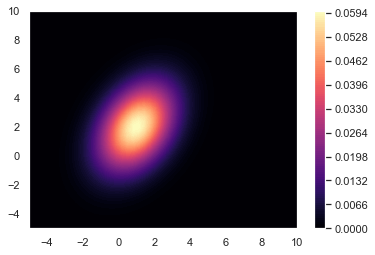

In [84]:
from scipy.linalg import cho_factor, cho_solve
d =2
mean = np.array([1, 2])[:, None]
cov = np.array([[2, 1], [1, 4]])
L = cho_factor(cov, lower=True)
diagL = np.diag(L[0])
detcov = np.prod(diagL) ** 2  #Sigma = LL^T ; Determinant of prod =  prod. of determinant.
Z = 1./np.sqrt(((2*np.pi)**2)*detcov)  #normalizing constant 

#define a grid over x 
x1 = np.linspace(-5, 10, 50)
X1, X2 = np.meshgrid(x1, x1)
Xgrid = np.hstack([X1.flatten()[:, None], X2.flatten()[:, None]])[:, :, None]
Pdfs = np.array([Z*np.exp(-0.5*np.dot((xp-mean).T, cho_solve(L, xp-mean))) for xp in Xgrid])  ## See note below

## For those new to Python, the above line uses the concept of list comprehensions in Python. 
## See here: http://www.secnetix.de/olli/Python/list_comprehensions.hawk
## This is extremely useful for looping over simple expressions. 
## See also the map function: http://book.pythontips.com/en/latest/map_filter.html

#visualize the density
plt.contourf(X1, X2, Pdfs.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar();

Define a function ```mvnpdf``` which accepts an input $\mathbf{x}$ of any arbitrary dimension, $d$, and also accepts a mean vector and covariance matrix and returns the density of the normal distribution with given mean and covariance at point $\mathbf{x}$. Feel free to re-use any/all code from the example given above.

In [85]:
def mvnpdf(x,mean,cov):
    """
    Returns the density of the normal distribution with given mean and covariance at point x

    Inputs:
    x: data vector of dimension d
    mean: mean vector
    cov: covariance matrix
    Outputs:
    Pd: Probability density 
    """
    d = x.shape[0]
    L = cho_factor(cov, lower=True) # Cholesky decomposition
    diagL = np.diag(L[0])
    detcov = np.prod(diagL) ** 2  #Sigma = LL^T ; Determinant of prod =  prod. of determinant.
    Z = 1./np.sqrt(((2*np.pi)**2)*detcov)  #normalizing constant 

    # Probability Density 
    Pd = Z*np.exp(-0.5*np.dot((x-mean).T, cho_solve(L, x-mean)))
    return Pd


**Note: You can assume that the density is non-degenerate, i.e., the covariance matrix is positive definite.**

Let's test your implementation. Use ```numpy.random.randn``` and ```sklearn.datasets.make_spd_matrix```  to generate random mean vector and covariance matrix, $\mu$ and $\Sigma$ for a random variable in $2$ dimensions. Visualize the contours of the density function. Use ```scipy.stats.multivariate_normal``` to verify that you get the correct result. 

In [117]:
d = 2 # dimension
mean_mv = np.random.randn(d,1) # samples from the “standard normal” distribution
cov_mv = make_spd_matrix(d) # random symmetric, positive-definite matrix

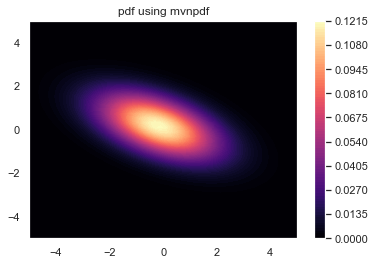

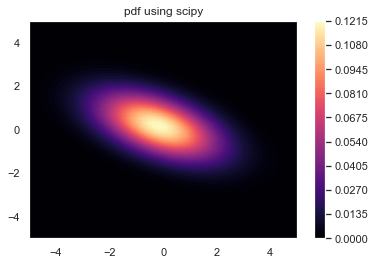

In [118]:
# Define a grid over x 
x1 = np.linspace(-5, 5, 50)
X1, X2 = np.meshgrid(x1, x1)
Xgrid = np.hstack([X1.flatten()[:, None], X2.flatten()[:, None]])[:, :, None]

# pdf from written function
Pdf_mvnpdf = np.array([mvnpdf(xp,mean_mv,cov_mv) for xp in Xgrid])
fig, ax = plt.subplots()
plt.contourf(X1, X2, Pdf_mvnpdf.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar()
plt.title('pdf using mvnpdf')
plt.show()
plt.close()

# pdf from Scipy inbuilt function 
rv = st.multivariate_normal(mean=mean_mv.flatten(),cov=cov_mv)
Pdf_scipy = np.array([rv.pdf(xp.T) for xp in Xgrid])
fig, ax = plt.subplots()
plt.contourf(X1, X2, Pdf_scipy.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar()
plt.title('pdf using scipy')
plt.show()
plt.close()

As can be seen from the above two plots that the contour of 2-d multivariable normal distribution based on written function and one from scipy are same, so, our written funciton give correct result.

## Sampling from a multivariate Gaussian

Recall that a univariate random variable, $\mathbf{q} \sim \mathcal{N}({\mathbf{q}|\mu, \sigma^2})$, can be expressed as $\mathbf{q} = \mu + \sigma \mathbf{z}$, where, $\mathbf{z} \sim \mathcal{N}({\mathbf{z}|0, 1})$ is a standard normal random variable. This suggests an easy approach for sampling from a univariate distribution with arbitrary mean and variance - Sample from the standard normal distribution $\mathcal{N}(0, 1)$, scale the result by standard deviation $\sigma$ and then translate by $\mu$.

The approach to sampling from a multivariate Gaussian is analogous to the univariate case. Here are the steps:
1. Compute  the Cholesky decomposition of the covariance matrix $\Sigma$ i.e. find $\mathbf{L}$ such that $\Sigma = \mathbf{L} \mathbf{L}^T$.
2. Sample a vector $\mathbf{z}$ from the multivariate standard normal in the given dimensions, i.e., $\mathcal{N}(\mathbf{0}_{d}, ,\mathbf{I}_{d\times d})$.
3. Scale and shift: $\mathbf{x} = \mu + \mathbf{L}\mathbf{z}$.

The code below samples from the MVN defined in the previous section of this question.

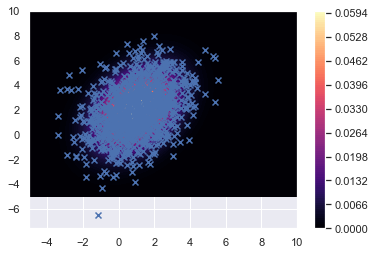

In [119]:
nsamples = 1000
samples = np.array([mean+np.dot(np.tril(L[0]), np.random.randn(2, 1)) for i in range(nsamples)])[:, :, 0]
x1 = samples[:,0]
x2 = samples[:,1]

# plot samples and compare to the pdf
fig, ax = plt.subplots()
x = np.linspace(-5, 10, 50)
X1, X2 = np.meshgrid(x, x)
plt.contourf(X1, X2, Pdfs.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar()
plt.scatter(x1, x2, marker='x');

Note that the generated samples look like they have been drawn from the MVN defined earlier. 

Define a function ```mvnsamples``` which accepts as input the mean vector and covariance matrix of a multivariate distribution of any arbitrary dimension, $d$, and returns $n$ samples from the distribution. $n$ is also to be passed as a parameter to the function.

In [120]:
def mvnsamples(mean,cov,nsamples):
    """
    Returns n samples from the multivariate normal distribution of dimensiond d with given mean and covariance

    Inputs:
    mean: mean vector
    cov: covariance matrix
    nsamples: number of samples
    Outputs:
    samples: samples of distribution
    """
    mean = mean[:,0]
    d = mean.shape[0]
    L = cho_factor(cov, lower=True) # Cholesky decomposition
    samples = np.array([mean+np.dot(np.tril(L[0]), np.random.randn(d, 1)) for i in range(nsamples)])[:, :, 0]
    return samples

Let's test your implementation. For the same mean and covariance generated earlier, draw $n$ samples and visualize it with a scatter plot. Make sure to compare the scatter plot with the density contours to verify your sampler is implemented correctly. 

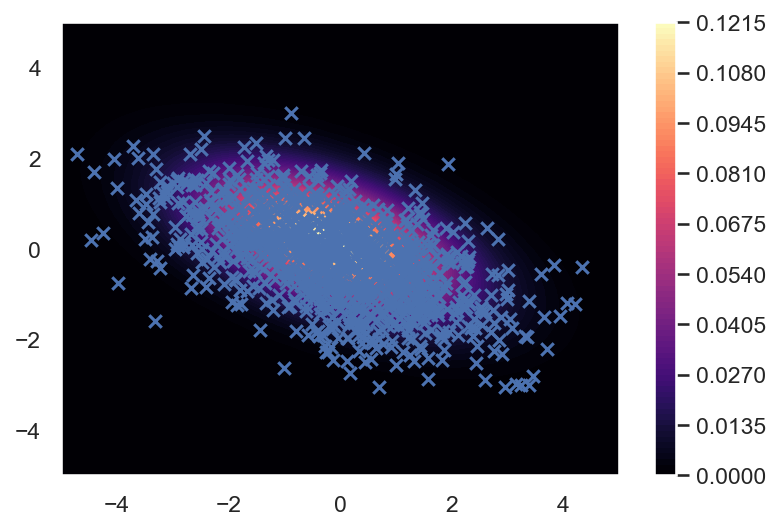

In [121]:
nsamples = 1000
samples = mvnsamples(mean_mv,cov_mv,nsamples)
fig, ax = plt.subplots(dpi=150)
x = np.linspace(-5, 5, 50)
X1, X2 = np.meshgrid(x, x)
plt.contourf(X1, X2, Pdf_scipy.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar()
x1 = samples[:,0]
x2 = samples[:,1]
plt.scatter(x1, x2, marker='x');

# Problem 4 - Linear regression on noisy dataset

Consider the following dataset:

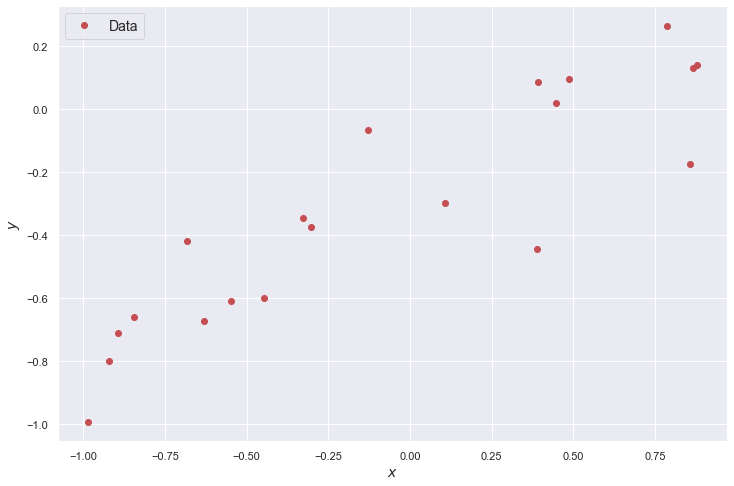

In [8]:
data =  np.loadtxt('hw3_data1.txt')
X = data[0, :]
Y = data[1, :]
plt.figure(figsize=(12, 8))
plt.plot(X, Y, 'ro', label = 'Data')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend(loc='best', fontsize = 14)

We will try to fit the following linear regression model for this dataset: 
$$
f(x;\mathbf{w}) = w_0 + w_1 x,
$$
where, $w_0$ and $w_1$ are model  parameters. 

## Part A

### Bayesian linear regression (Part 1)

Consider the additive noise model:
$$
y = f(x;\mathbf{w}) + \epsilon = w_0 + w_1 x + \epsilon,
$$
where, $\epsilon \sim \mathcal{N}(\epsilon|0, \sigma^2)$.

Consider the following isotropic prior on the weights:
$$
p(\mathbf{w}) = \mathcal{N}(\mathbf{w}|0, \alpha^{-1}\mathbf{I}).
$$

The density function of multivariate Gaussians can be found [here](https://en.wikipedia.org/wiki/Multivariate_normal_distribution). We will take a look at how to efficiently compute the density of multivariate Gaussians later in the course but for the time being let's use [scipy's implementation](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html) of the same to visualize the prior. 

Generate a grid of $w_0$ and $w_1$ values and use scipy's ```multivariate_normal.pdf``` method to compute the prior probability density at each location of the grid. Note that the prior mean and covariance are shown in the expression above. Show the contour plot of the prior pdf. If you aren't already familiar, check out [this tutorial](https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html) on matplotlib contour plots.


In [9]:
# write your code here

Generate some samples of $\mathbf{w}$ from the prior and visualize the corresponding. You can use ```numpy.multivariate_normal```. An example using arbitrary mean and covariance  is shown below:

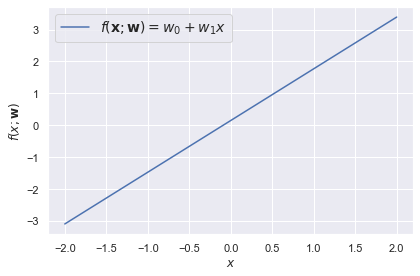

In [10]:
mean = np.array([1, 2])
cov = np.array([[2, 0], [0, 2]])
w_sample = np.random.multivariate_normal(mean = mean, cov = cov, size = 1)
w_0 = w_sample[0, 0]
w_1 = w_sample[0, 1]
x = np.linspace(-2, 2, 100)

plt.plot(x, w_0 + w_1*x, label='$f(\mathbf{x};\mathbf{w}) = w_0 + w_1 x$')
plt.xlabel('$x$')
plt.ylabel('$f(x;\mathbf{w})$')
plt.legend(loc='best', fontsize=14)
plt.tight_layout()

**Note**: Please make sure all samples of $f$ are shown in the same plot. 

In [11]:
# nsamples = 5 (whatever number you want) 
#
# Sample and visualize
#

Define a function that accepts the prior precision $\alpha$ and the noise variance $\sigma^2$ and returns the posterior mean and covariance of $w$. 

In [12]:
def postmeanvar(a, sigma2):
    """
    write code here to return posterior mean and covariance of w.
    """
    return

Visualize the posterior distribution over $w$ using scipy's ```multivariate_normal.pdf``` function. 

In [13]:
#
# Visualize the posterior
#

**How is the posterior different from the prior?**

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br><br><br><br><br><br><br><br><br>

Plot some samples from the posterior distribution:

In [14]:
#
#  Code to plot some samples from posterior 
#

Visualize the mean and variance of the posterior predictive distribution. Make sure to distinguish between 
measurement noise and epistemic uncertainty.

In [15]:
#
# Visualize posterior predictive distribution.
#

It is a good idea to set aside a part of your dataset for the purpose of testing the accuracy of your trained model. 
Consider the following test dataset:

In [16]:
testdata = np.loadtxt('hw3_data1_test.txt')
Xtest = testdata[0, :]
Ytest = testdata[1, :]

Make predictions on the test inputs, ```Xtest```, using the posterior predictive distribution under the Bayesian model. Compare it to the least squares predictions. Recall that the  least squares estimate of $\mathbf{w}$ is given by:
$$
\mathbf{w}_{\mathrm{LS}} = (\mathbf{\Phi}^T \mathbf{\Phi})^{-1} \mathbf{\Phi}^T y_{1:N}. 
$$
Use ```numpy.lstsq``` to obtain $\mathbf{w}_{\mathrm{LS}}$. The prediction at a new test location $x^*$ is given by $y^* = \mathbf{w}_{\mathrm{LS}, 0} + \mathbf{w}_{\mathrm{LS}, 1}x^*$.

In [17]:
#
#  Ypred_ls =  #least squares prediction.
#  Ypred_bayes =  #bayesian model prediction. 

**Which model (Bayesian or least squares) offers better predictions? Why do you think that is?**

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br><br><br><br><br><br><br><br><br>

**In what situations (if any) would you expect simple least squares regression to perform better than the Bayesian regression?**

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br><br><br><br><br><br><br><br><br>

## Part B

### Evidence approximation

Picking the hyperparameters $\alpha$ and $\sigma^2$ is tricky. In theory, the fully approach to modeling the uncertainty in the hyperparameters is  simple - put  priors on them and make predictions on test data by marginalizing wrt to the hyperparameters and model weights. In practice, the resulting integrals are intractable. A popular and easy to implement approach to hyperparameter selection is [cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)). The idea is to choose a set of hyperparameter values, train the model at each value in the set and test it predictive accuracy. Finally, you select the values of the hyperparameters that offer the best predictive capacity.

A more systematic approach is to maximize the model evidence. The evidence is the marginal likelihood  of the data conditional on the hyperparameters, i.e., $p(y|x, \alpha, \sigma^2)$. 
Under the Gaussian likelihood and isotropic Gaussian prior model, the log evidence is given by:
$$
log p(y|x, \alpha, \beta) = \frac{M}{2} \log \alpha + \frac{N}{2} \log \beta - E(\mathbf{m}) -\frac{1}{2} \log \mathrm{det}(A) - \frac{N}{2} \log 2\pi,
$$
where, 
$\beta$ is the inverse noise variance (or precision), 

$$A = \alpha \mathbf{I} + \beta \Phi^T \Phi,$$ $$\mathbf{m} = \beta A^{-1} \Phi^T y_{1:N},$$

and $M$ is the number of model parameters, which in this case is 2. 

The term $E(\mathbf{m})$ is a regularized misfit term given by:
$$
E(\mathbf{m}) = \frac{\beta}{2} \| y_{1:N} - \Phi \mathbf{m} \|_{2}^{2} + \frac{\alpha}{2} \| \mathbf{m} \|_{2}^{2}.
$$

Set up a function ```evidence``` that accepts the prior precision, $\alpha$ and the inverse noise variance, $\beta$, and returns the value of the evidence function. Feel free to parameterize your implementation of the ```evidence``` in whatever way you see fit.

In [18]:
def evidence():
    """
    Set this up.
    """
    return

Use a suitable second order unconstrained optimization routine from ```scipy.optimize``` to minimize the **negative log evidence**. A popular method is the [BFGS algorithm.](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html). Be sure to read the documentation carefully.

In [19]:
#
# Set up the optimization routine and minimize the negative log evidence. 
#

Use the estimates of the hyperparameters obtained by maximizing the evidence to recompute the posterior mean and variance of the model parameters under the constant prior precision and likelihood variance model. 

In [20]:
#
# compute posterior mean and variance. 
#

**Does this differ from your earlier estimate of the posterior mean and variance?**

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br><br><br><br><br><br><br><br><br>

**Visualize the following:** 
1.  The posterior density of $\mathbf{w}$.
2.  A few models sampled from the posterior. 
3.  The posterior predictive distribution  with noise variance and epistemic uncertainty.

In [21]:
#
#  Visualizations.
#

Finally, use the model you just trained to make predictions on the  test data:

In [22]:
#
# Ypred_ev =
#

**How do the predictions compare to the previous versions?**

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br><br><br><br><br><br><br><br><br>

# Problem 5

### Bayesian linear regression  (Part 2)

We will now look at a somewhat more complicated example. The following dataset was generated using a molecular dynamics simulation of a plastic material (thanks to [Professor Alejandro Strachan](https://engineering.purdue.edu/MSE/people/ptProfile?id=33239) for sharing the data!).
In particular, we took a rectangular chunk of the material and we started applying tensile forces along one dimension.
What you see in the data set below is the instantaneous measurements of *strain* (percent enlogation of the material in the pulling direction) vs the normal *stress* (force per square area in MPa = $10^6 \text{N}/m^2$).
This [video](https://youtu.be/K6vOkQ5F9r0) will help you understand how the dataset was generated.

Text(0, 0.5, 'Stress $\\sigma$')

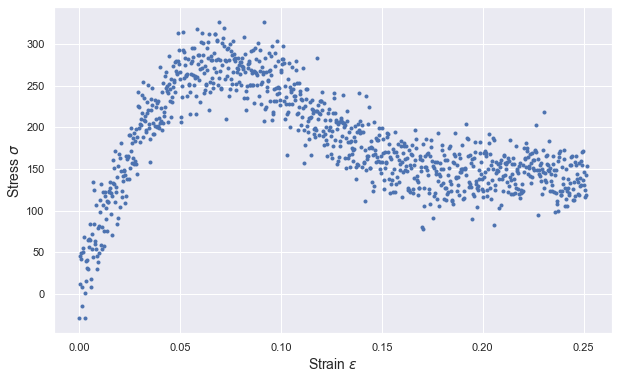

In [23]:
data = np.loadtxt('stress_strain.txt')
epsilon = data[:, 0]
sigma = data[:, 1]
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(epsilon, sigma, '.')
ax.set_xlabel('Strain $\epsilon$', fontsize = 14)
ax.set_ylabel('Stress $\sigma$', fontsize = 14)

This is a noisy dataset.
We would like to process it in order to extract what is known as the [stress-strain curve](https://en.wikipedia.org/wiki/Stress–strain_curve) of the material.
The stress-strain curve characterizes the type of the material (the chemical bonds, the crystaline structure, any defects, etc.).
It is a required input to the equations of [elasticity](https://en.wikipedia.org/wiki/Elasticity_(physics)) otherwise known as a *constitutive relation*.

### Part A
The very first part of the stress-strain curve is very close to being linear.
It is called the *elastic regime*.
In that region, say $\epsilon < \epsilon_l=0.04$, the relationship between stress and strain is:
$$
\sigma(\epsilon) = E\epsilon.
$$
The constant $E$ is known as the *Young modulus* of the material.
Use a generalized linear model and Bayesian linear regression to:
+ Compute the posterior of $E$ given the data;
+ Visualize your epistemic and aleatory uncertainty about the stress-strain curve in the elastic regime;
+ Take five plaussible samples of the linear stress-strain curve and visualize them.

In your answer, you should first clearly describe your model in text using the notation of the lectures and then code the solution.

In [24]:
# enter code here.

### Part B
Now, come up with a generalized linear model that can capture the non-linear part of the stress-strain relation.
Remember, you can use any model you want as soon as:
+ it is linear in the parameters to be estimated,
+ it clearly has a well-defined elastic regime (see Part A).

Use your model to:
+ Derive, compute, and visualize a probabilistic estimate of the peak of the stress-strain curve (the so-called *yield stress*). This is not necessarily going to be Gaussian or even analytically available;
+ Visualize your epistemic and aleatory uncertainty about the stress-strain curve.
+ Take five plaussible samples of the linear stress-strain curve and visualize them.

In your answer, you should first clearly describe your model in text using the notation of the lectures and then code the solution.

*Hint: You can use the Heavide step function to turn on or off models for various ranges of $\epsilon$. The idea is quite simple. Here is a model that has the right form in the elastic regime and an arbitrary form in the non-linear regime:*
$$
f(\epsilon) = E\epsilon \left[(1 - H(\epsilon - \epsilon_l)\right] + g(\epsilon;\mathbf{w}_g)H(\epsilon - \epsilon_l),
$$
where
$$
H(x) = \begin{cases}
0,\;\text{if}\;x < 0\\
1,\;\text{otherwise}.
\end{cases}
$$

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br><br><br><br><br><br><br><br><br>

### Part C

The model you constructed in part B may have a disctontinuity at $\epsilon=\epsilon_l$.
How can you enforce continuity of $\sigma(\epsilon)$ and its first derivative at that point?
Can you reparameterize the model of part B, so that this condition is automatically satisfied?
If yes, then repeat the analysis of part B.

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br><br><br><br><br><br><br><br><br>

In [25]:
# Enter your code here

-End-